### Import Libraries and dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
df = pd.read_csv('/content/sample_data/apple_quality.csv')
df .head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


### Describe dataset

In [ ]:
# Convert 'Quality' to numerical
df['Quality'] = df['Quality'].map({'good': 1, 'bad': 0})

print("\nOriginal data dimension:\n")
print(df.shape)

print("\nSummary:\n")
print((df).describe())


Original data dimension:

(4000, 9)

Summary:

              A_id         Size       Weight    Sweetness  Crunchiness  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean   1999.500000    -0.503015    -0.989547    -0.470479     0.985478   
std    1154.844867     1.928059     1.602507     1.943441     1.402757   
min       0.000000    -7.151703    -7.149848    -6.894485    -6.055058   
25%     999.750000    -1.816765    -2.011770    -1.738425     0.062764   
50%    1999.500000    -0.513703    -0.984736    -0.504758     0.998249   
75%    2999.250000     0.805526     0.030976     0.801922     1.894234   
max    3999.000000     6.406367     5.790714     6.374916     7.619852   

         Juiciness     Ripeness      Acidity      Quality  
count  4000.000000  4000.000000  4000.000000  4000.000000  
mean      0.512118     0.498277     0.076877     0.501000  
std       1.930286     1.874427     2.110270     0.500062  
min      -5.961897    -5.864599    -7.010538 

In [ ]:
missing_values = df.isnull().sum()
print("\nMissing Values (Original Data):\n")
print(missing_values)

# Identify duplicates in the DataFrame
duplicates = df[df.duplicated()]

# Print the duplicate rows
print("\nDuplicates: \n")
print(duplicates)

# Identify data types and inconsistencies
print("\nData Types:")
print(df.dtypes)


Missing Values (Original Data):

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

Duplicates: 

Empty DataFrame
Columns: [A_id, Size, Weight, Sweetness, Crunchiness, Juiciness, Ripeness, Acidity, Quality]
Index: []

Data Types:
A_id             int64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity        float64
Quality          int64
dtype: object


In [ ]:
df.drop(columns=['A_id'], inplace=True)
numerical_cols = df.columns

In [ ]:
#Check for outliers based on IQR
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\nOutliers for {col}:\n", outliers)


Outliers for Size:
           Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
251   5.189624 -0.380352   0.674041     2.711903   4.226955 -2.088012   
276  -6.129668  4.738227   0.253477    -1.393228   1.964849 -3.410881   
634   5.866232  0.821114  -0.592951     0.768464   3.050095  0.684049   
1110 -5.975032 -0.829743   5.538865     2.010827   1.415675 -0.997706   
1381  6.406367 -2.752347  -4.164118     0.415241   0.999640  3.995602   
1516 -6.690121  3.556307   0.164711     0.143442   2.567518 -2.319071   
2001 -6.905803 -0.599815   3.640811    -0.807991   3.090987 -1.912564   
2002  5.403276 -4.026721  -3.991688     1.621552   2.086260  3.162070   
2035 -5.879771  0.985776   0.483918     0.896278   3.640081 -1.692468   
2120  4.834608 -5.187416  -1.230021     1.010198   4.759434  0.311024   
2331 -6.669725 -1.371586  -0.677897    -1.649712   0.974617  4.214320   
2458 -6.713315 -0.179871   4.293285    -3.404415   1.265507  0.372189   
2514  4.799683  0.531144   0.6

### Explaratory Visualization of dataset

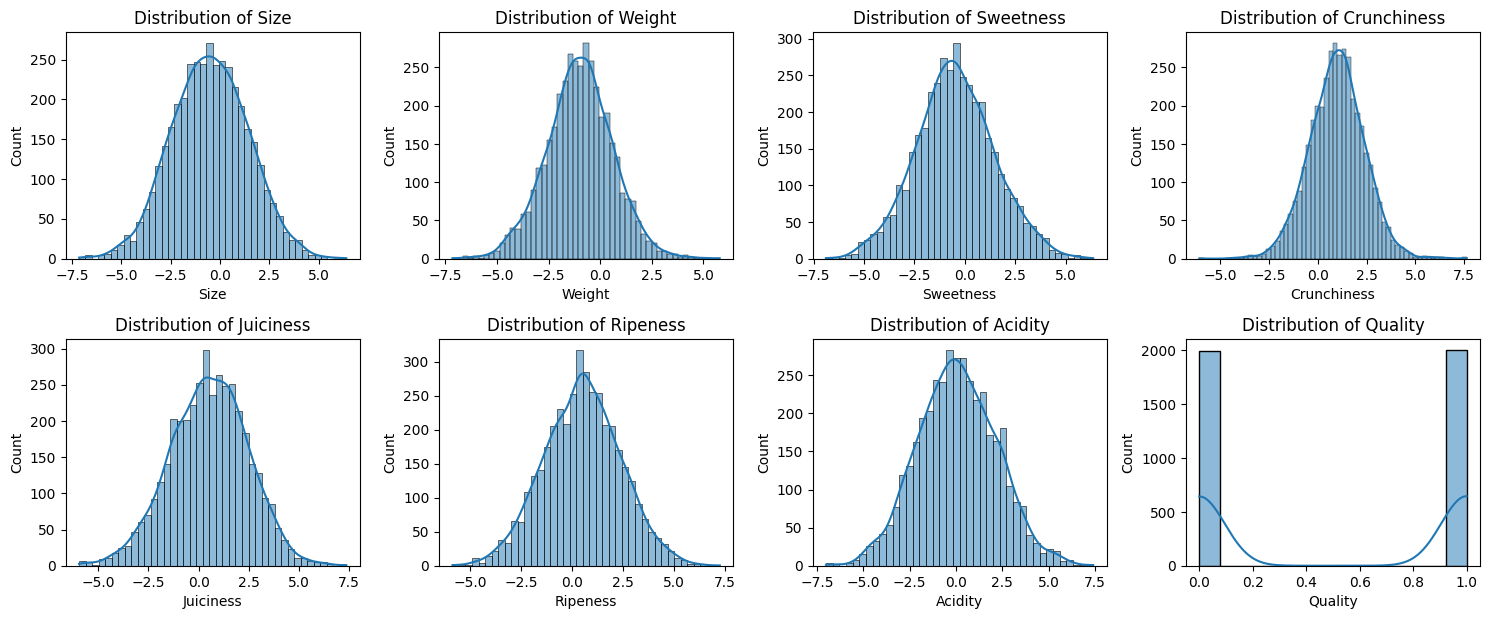

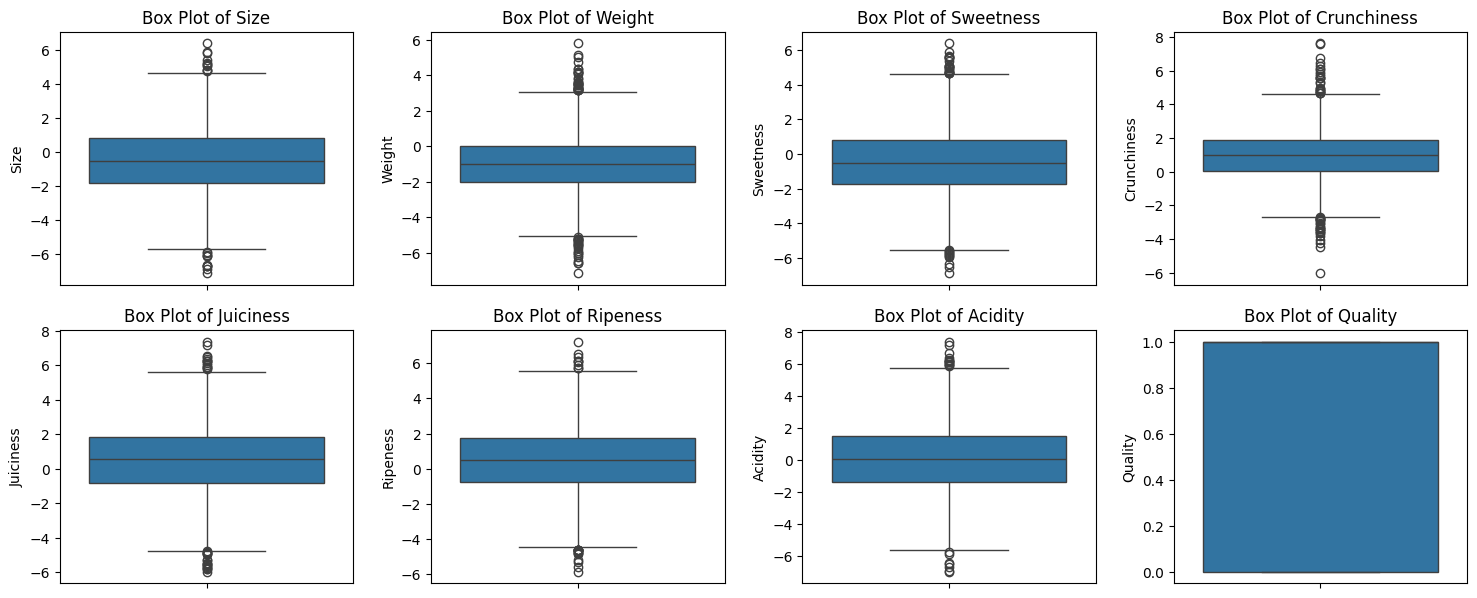

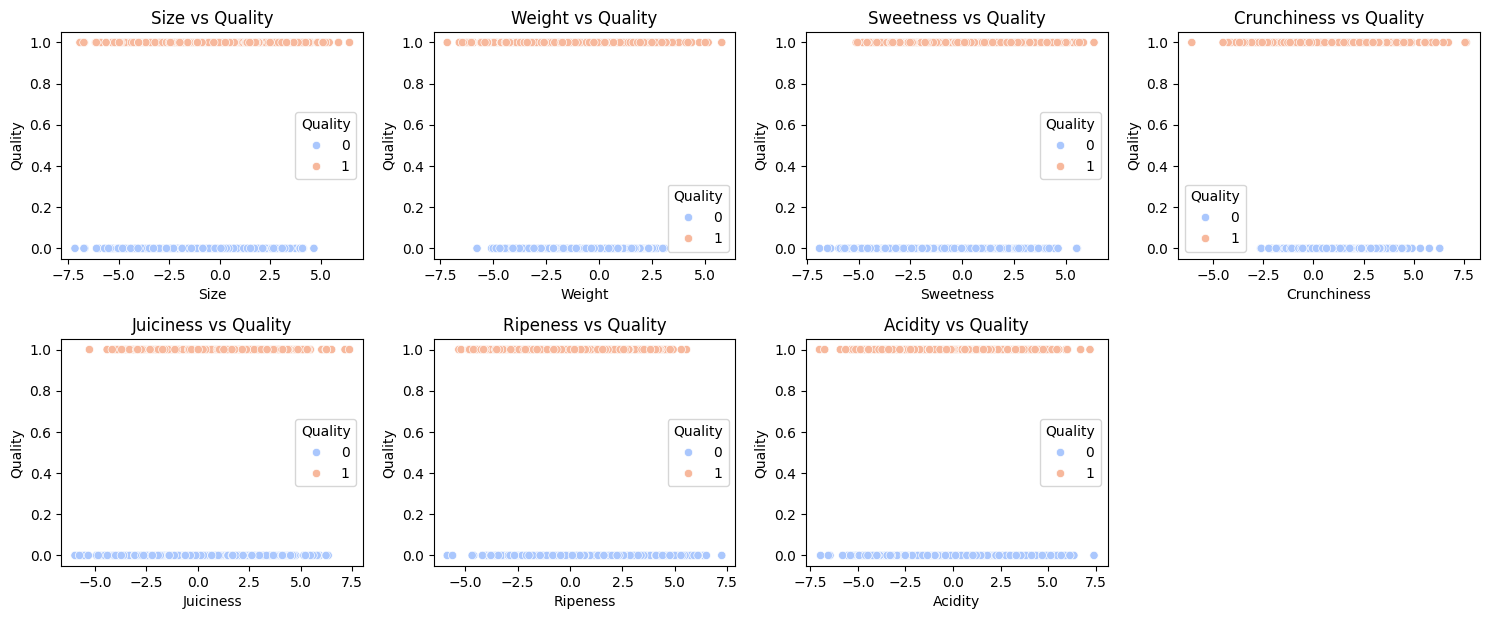

In [ ]:
# Histograms for all numerical features
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


def boxplot_outliers(df, numerical_cols):
  # Box plots for all numerical features
  plt.figure(figsize=(15, 12))
  for i, col in enumerate(numerical_cols):
      plt.subplot(4, 4, i + 1)
      sns.boxplot(y=df[col])
      plt.title(f'Box Plot of {col}')
  plt.tight_layout()
  plt.show()

boxplot_outliers(df, numerical_cols)

target = 'Quality'
# Scatter plots of 'Quantity' vs. other numerical features
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols):
    if col != target:
        plt.subplot(4, 4, i + 1)
        sns.scatterplot(x=df[col], y=df[target], hue=df[target], palette='coolwarm')
        plt.title(f"{col} vs {target}")
        plt.xlabel(col)
        plt.ylabel(target)

plt.tight_layout()
plt.show()


### Data Normalization

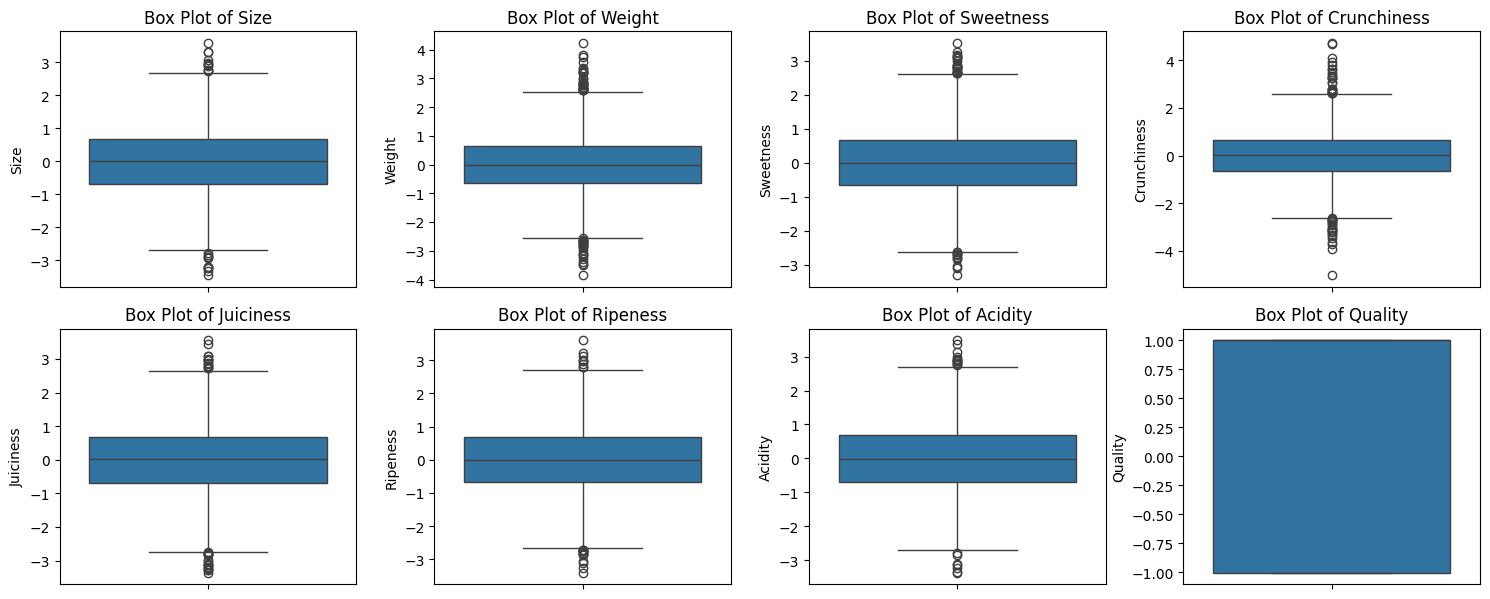

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


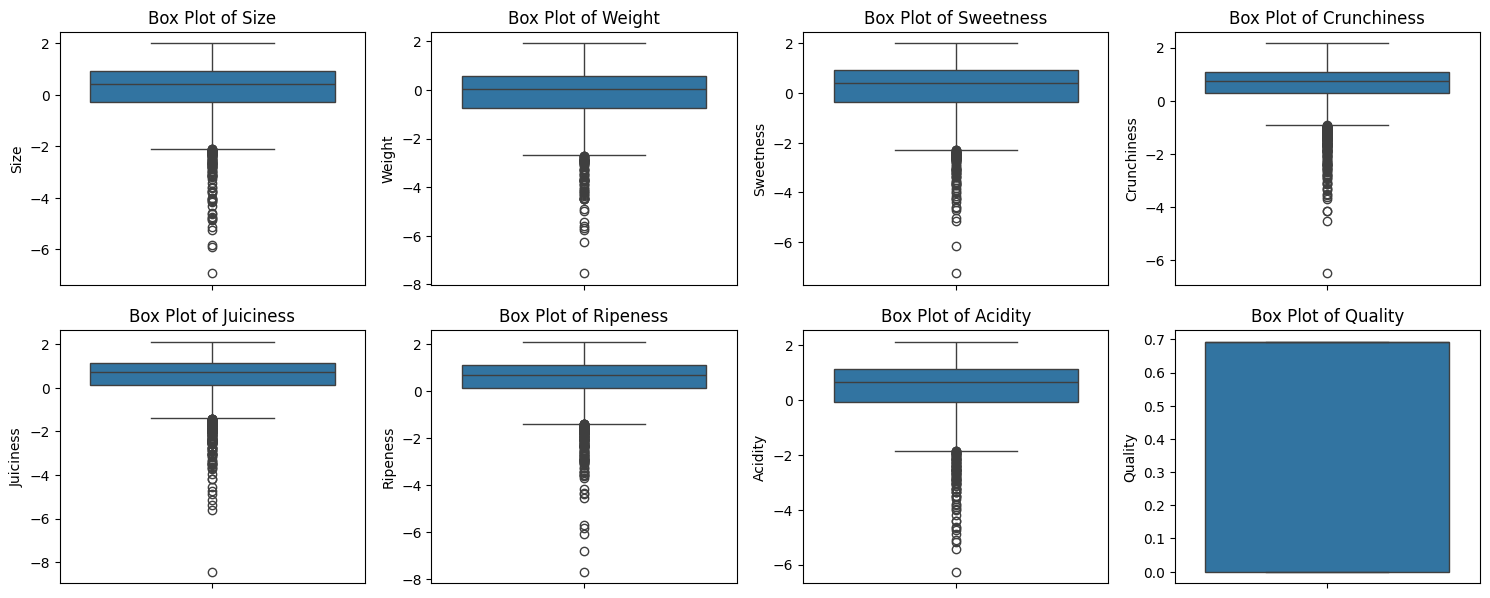

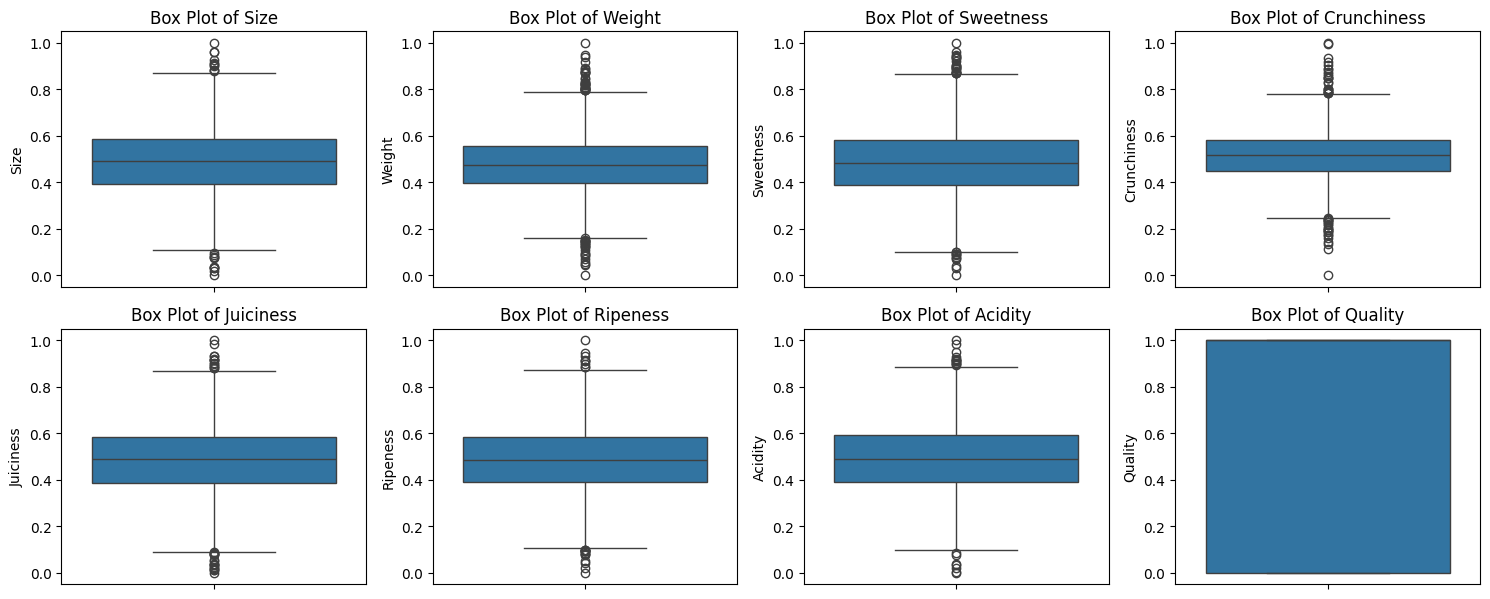

In [ ]:
# Scale numerical features using StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_cols]), columns=numerical_cols)

boxplot_outliers(df_scaled, numerical_cols)

for i, col in enumerate(numerical_cols):
  df_scaled[col] = np.log1p(df[col])

boxplot_outliers(df_scaled, numerical_cols)

min_max_scaler = MinMaxScaler()
df_scaled[numerical_cols] = min_max_scaler.fit_transform(
    df[numerical_cols]
)

boxplot_outliers(df_scaled, numerical_cols)



### Numerical normalization test

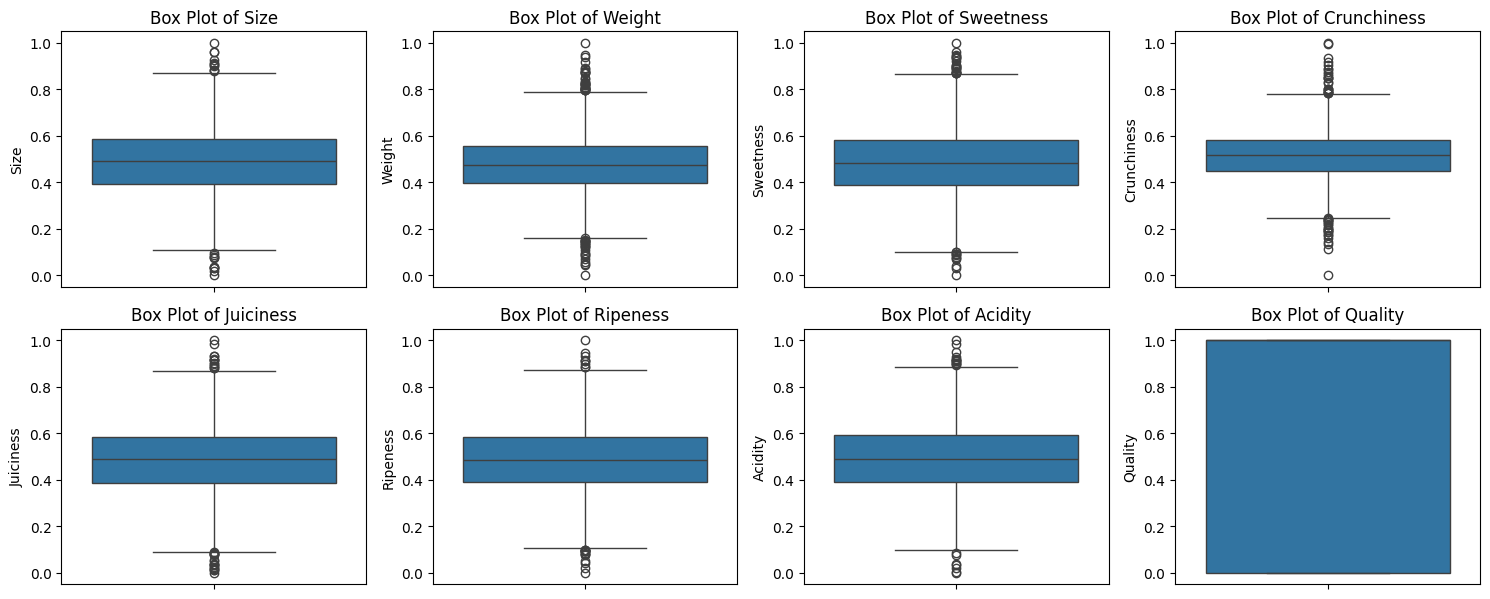

In [ ]:
df_scaled = df.copy()

min_max_scaler = MinMaxScaler()
df_scaled[numerical_cols] = min_max_scaler.fit_transform(
    df[numerical_cols]
)

boxplot_outliers(df_scaled, numerical_cols)

### Data split on training and test sets

In [ ]:
# Separate features and target
X = df.drop(columns=target)
y = df[target]

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=210029807, stratify=y
)

# Check shapes of training and set sets
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (3200, 7)
Test set shape: (800, 7)


# **kNN classification**

In [ ]:
# Create and train KNN model (you can tune n_neighbors)
knn_model = KNeighborsClassifier(n_neighbors=9)
knn_model.fit(X_train, y_train)

# Predict on training set
y_train_pred_knn = knn_model.predict(X_train)

# Evaluation metrics
mse_knn = mean_squared_error(y_train, y_train_pred_knn)
mae_knn = mean_absolute_error(y_train, y_train_pred_knn)
rmse_knn = np.sqrt(mse_knn)

print(" KNN Classifier - Training Set Evaluation:")
print(f" MSE: {mse_knn:.4f}")
print(f" MAE: {mae_knn:.4f}")
print(f" RMSE: {rmse_knn:.4f}\n")

# Classification report
print(" Classification Report:")
print(classification_report(y_train, y_train_pred_knn))

# Confusion matrix
conf_matrix_knn = confusion_matrix(y_train, y_train_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - KNN (Train Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


NameError: name 'KNeighborsClassifier' is not defined

KNN - Test Set:
MSE: 0.0950
MAE: 0.0950
RMSE: 0.3082

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       399
           1       0.89      0.93      0.91       401

    accuracy                           0.91       800
   macro avg       0.91      0.90      0.90       800
weighted avg       0.91      0.91      0.90       800



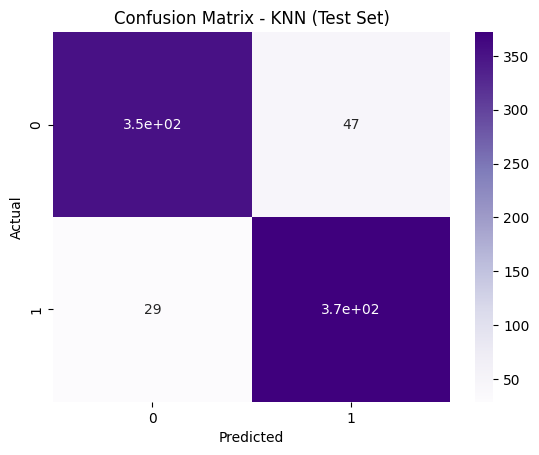

In [ ]:
# Predict on test set
y_test_pred_knn = knn_model.predict(X_test)

# Evaluation
mse_knn_test = mean_squared_error(y_test, y_test_pred_knn)
mae_knn_test = mean_absolute_error(y_test, y_test_pred_knn)
rmse_knn_test = np.sqrt(mse_knn_test)

print("KNN - Test Set:")
print(f"MSE: {mse_knn_test:.4f}")
print(f"MAE: {mae_knn_test:.4f}")
print(f"RMSE: {rmse_knn_test:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_test_pred_knn))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_test_pred_knn), annot=True, cmap='Purples')
plt.title("Confusion Matrix - KNN (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# **Decision Tree**

Decision Tree - Training Set Evaluation:
MSE: 0.0966
MAE: 0.0966
RMSE: 0.3107

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1597
           1       0.94      0.86      0.90      1603

    accuracy                           0.90      3200
   macro avg       0.91      0.90      0.90      3200
weighted avg       0.91      0.90      0.90      3200



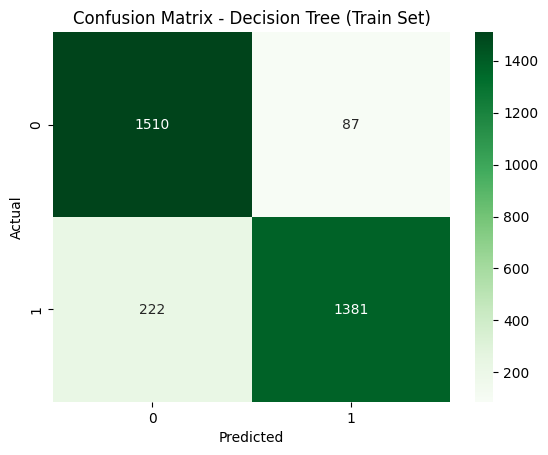

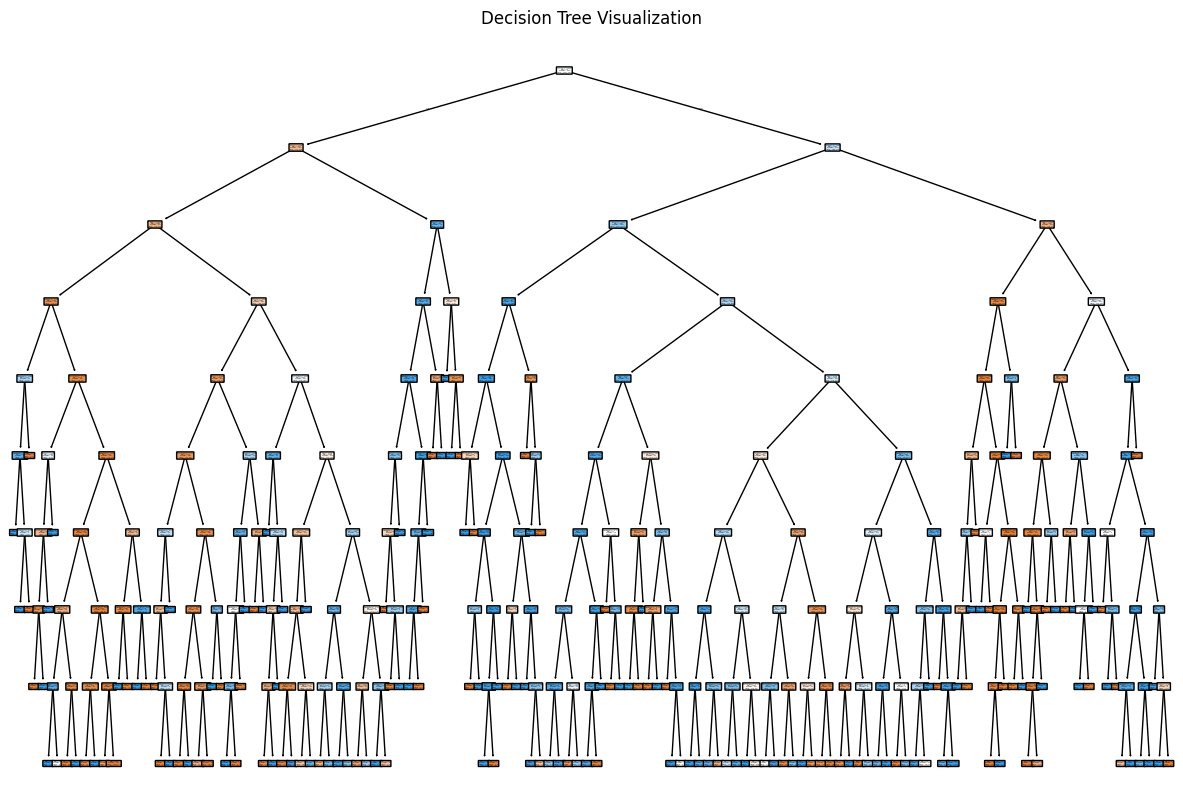

Decision Tree - Test Set Evaluation:
MSE: 0.1975
MAE: 0.1975
RMSE: 0.4444

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       399
           1       0.85      0.74      0.79       401

    accuracy                           0.80       800
   macro avg       0.81      0.80      0.80       800
weighted avg       0.81      0.80      0.80       800



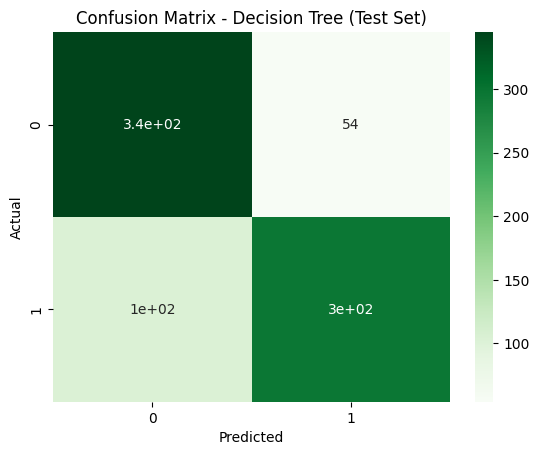

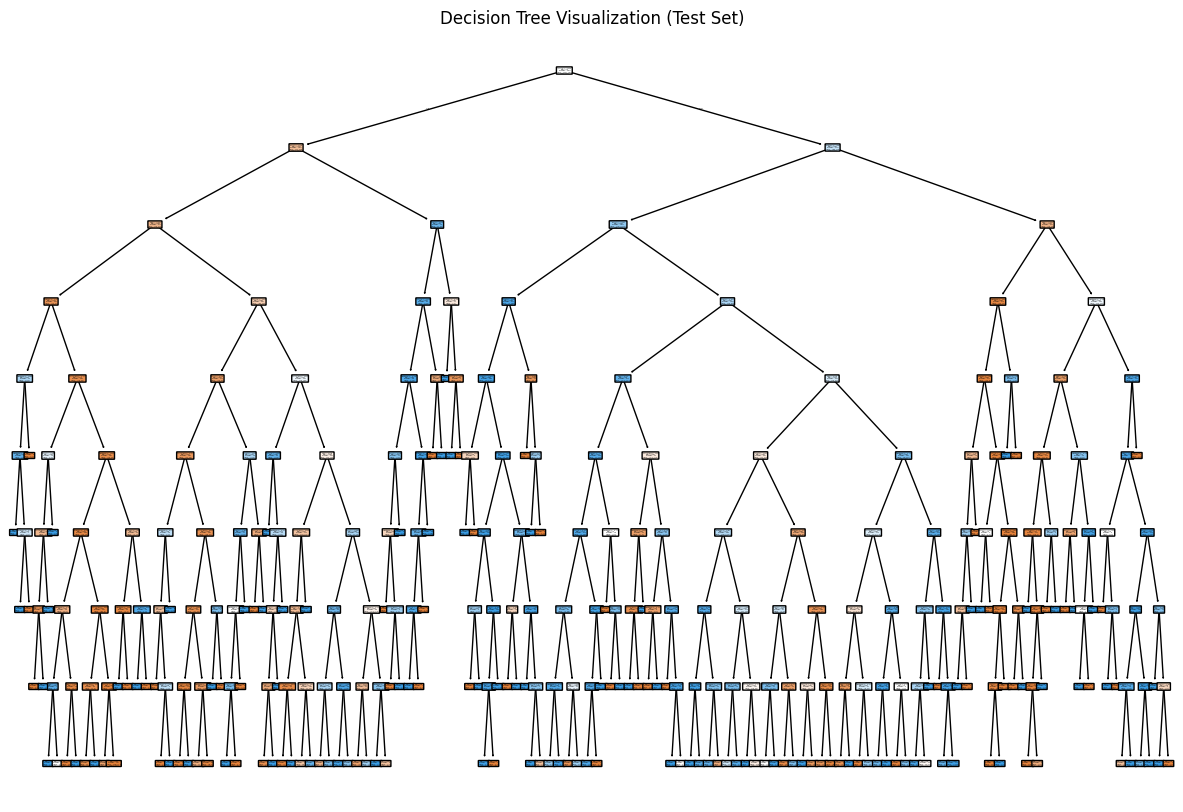

In [ ]:
# Create and train the Decision Tree model
tree_model = DecisionTreeClassifier(max_depth=9, min_samples_split=2, random_state=210029807)

tree_model.fit(X_train, y_train)

# Predict on training set
y_train_pred_tree = tree_model.predict(X_train)

# Evaluation metrics
mse_tree = mean_squared_error(y_train, y_train_pred_tree)
mae_tree = mean_absolute_error(y_train, y_train_pred_tree)
rmse_tree = np.sqrt(mse_tree)

print("Decision Tree - Training Set Evaluation:")
print(f"MSE: {mse_tree:.4f}")
print(f"MAE: {mae_tree:.4f}")
print(f"RMSE: {rmse_tree:.4f}\n")

# Classification report
print("Classification Report:")
print(classification_report(y_train, y_train_pred_tree))

# Confusion matrix
conf_matrix_tree = confusion_matrix(y_train, y_train_pred_tree)
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Decision Tree (Train Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(tree_model, filled=True, feature_names=X_train.columns, class_names=['Good', 'Bad'], rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


# Predict on test set
y_test_pred_tree = tree_model.predict(X_test)

# Evaluation metrics for test set
mse_tree_test = mean_squared_error(y_test, y_test_pred_tree)
mae_tree_test = mean_absolute_error(y_test, y_test_pred_tree)
rmse_tree_test = np.sqrt(mse_tree_test)

print("Decision Tree - Test Set Evaluation:")
print(f"MSE: {mse_tree_test:.4f}")
print(f"MAE: {mae_tree_test:.4f}")
print(f"RMSE: {rmse_tree_test:.4f}\n")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred_tree))

# Confusion Matrix for test set
sns.heatmap(confusion_matrix(y_test, y_test_pred_tree), annot=True, cmap='Greens')
plt.title("Confusion Matrix - Decision Tree (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot the Decision Tree (same tree used for training)
plt.figure(figsize=(15, 10))
plot_tree(tree_model, filled=True, feature_names=X_train.columns, class_names=['Good', 'Bad'], rounded=True)
plt.title("Decision Tree Visualization (Test Set)")
plt.show()


Decision Tree - Training Set Evaluation:
MSE: 0.1122
MAE: 0.1122
RMSE: 0.3349

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88      1597
           1       0.86      0.93      0.89      1603

    accuracy                           0.89      3200
   macro avg       0.89      0.89      0.89      3200
weighted avg       0.89      0.89      0.89      3200



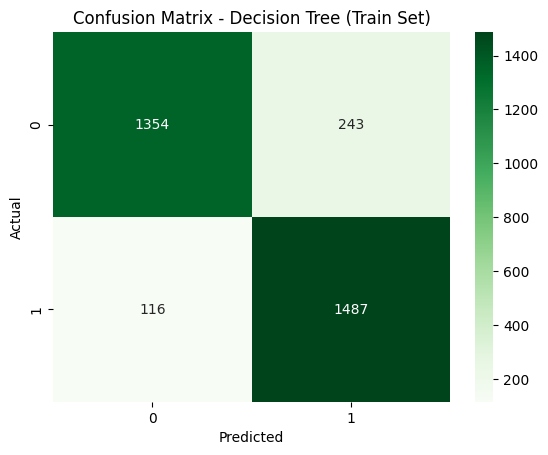

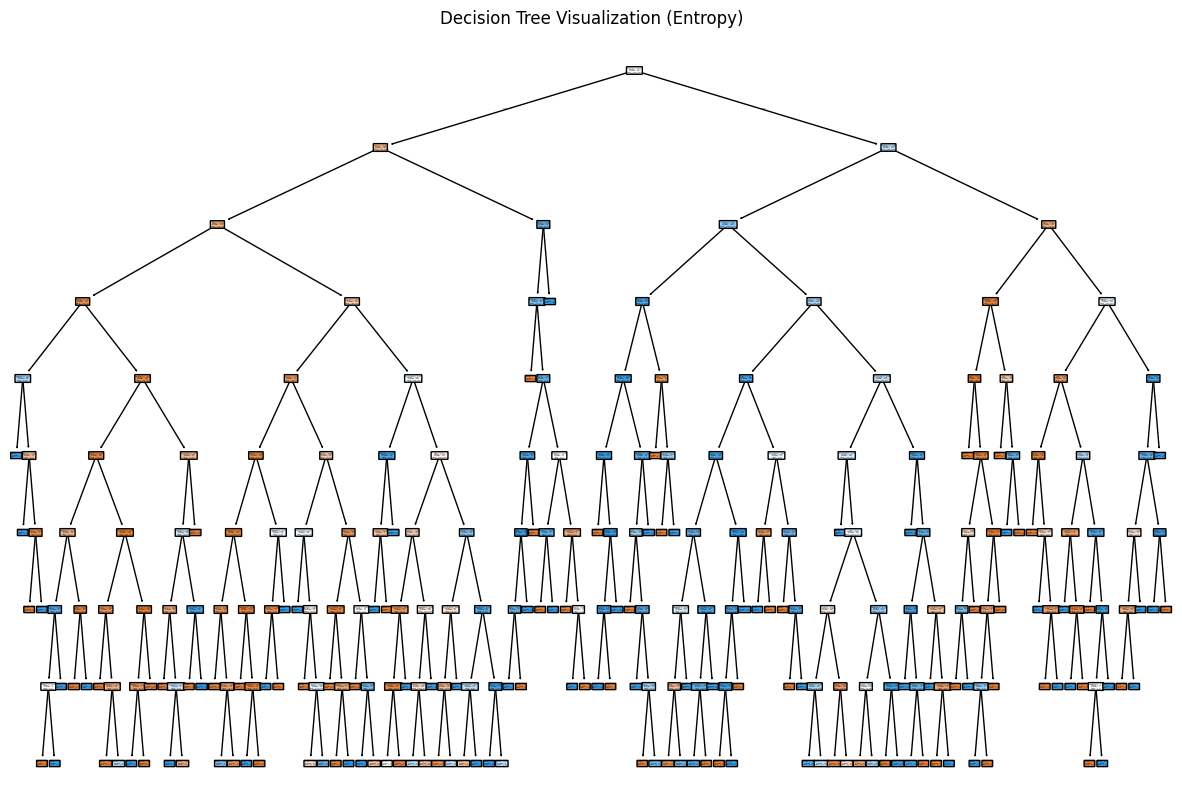

Decision Tree - Test Set Evaluation:
MSE: 0.2150
MAE: 0.2150
RMSE: 0.4637

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.74      0.77       399
           1       0.76      0.83      0.79       401

    accuracy                           0.79       800
   macro avg       0.79      0.78      0.78       800
weighted avg       0.79      0.79      0.78       800



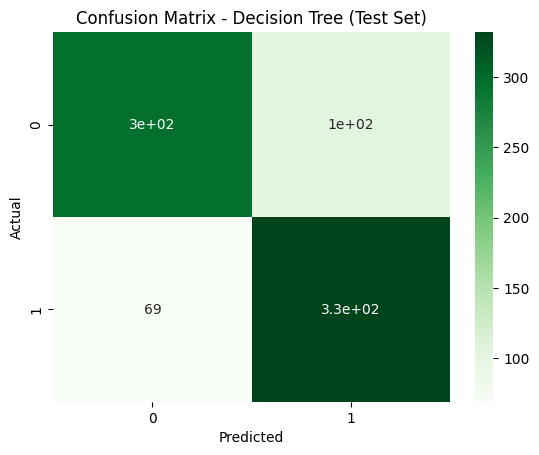

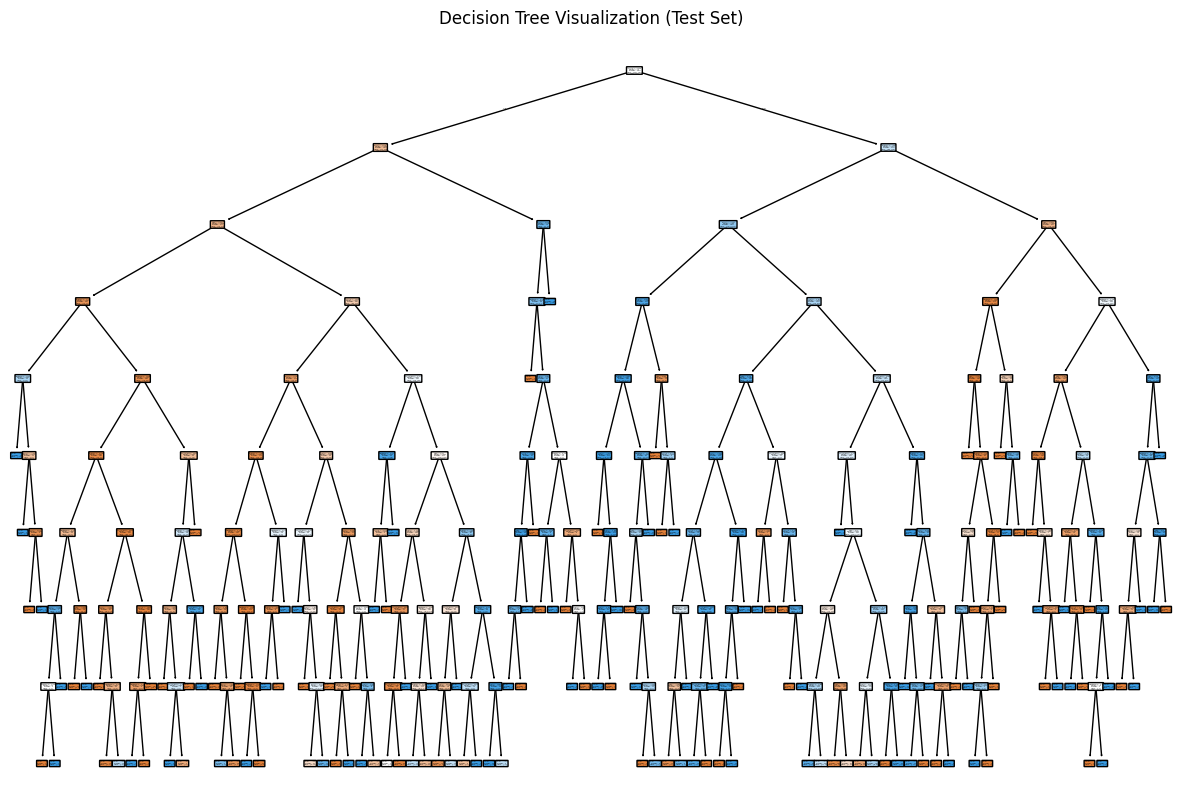

In [ ]:
# Create and train the Decision Tree model with entropy criterion
tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=2, random_state=210029807)
tree_model.fit(X_train, y_train)

# Predict on training set
y_train_pred_tree = tree_model.predict(X_train)

# Evaluation metrics
mse_tree = mean_squared_error(y_train, y_train_pred_tree)
mae_tree = mean_absolute_error(y_train, y_train_pred_tree)
rmse_tree = np.sqrt(mse_tree)

print("Decision Tree - Training Set Evaluation:")
print(f"MSE: {mse_tree:.4f}")
print(f"MAE: {mae_tree:.4f}")
print(f"RMSE: {rmse_tree:.4f}\n")

# Classification report
print("Classification Report:")
print(classification_report(y_train, y_train_pred_tree))

# Confusion matrix
conf_matrix_tree = confusion_matrix(y_train, y_train_pred_tree)
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Decision Tree (Train Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(tree_model, filled=True, feature_names=X_train.columns, class_names=['Good', 'Bad'], rounded=True)
plt.title("Decision Tree Visualization (Entropy)")
plt.show()

# Predict on test set
y_test_pred_tree = tree_model.predict(X_test)

# Evaluation metrics for test set
mse_tree_test = mean_squared_error(y_test, y_test_pred_tree)
mae_tree_test = mean_absolute_error(y_test, y_test_pred_tree)
rmse_tree_test = np.sqrt(mse_tree_test)

print("Decision Tree - Test Set Evaluation:")
print(f"MSE: {mse_tree_test:.4f}")
print(f"MAE: {mae_tree_test:.4f}")
print(f"RMSE: {rmse_tree_test:.4f}\n")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred_tree))

# Confusion Matrix for test set
sns.heatmap(confusion_matrix(y_test, y_test_pred_tree), annot=True, cmap='Greens')
plt.title("Confusion Matrix - Decision Tree (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot the Decision Tree (same tree used for training)
plt.figure(figsize=(15, 10))
plot_tree(tree_model, filled=True, feature_names=X_train.columns, class_names=['Good', 'Bad'], rounded=True)
plt.title("Decision Tree Visualization (Test Set)")
plt.show()
